# Importing the required libraries

In [43]:
import numpy as np
import random
from tensorflow.keras.models import Sequential, load_model
import matplotlib.pyplot as plt

### Load Dataset

In [44]:
train_x = np.loadtxt("Dataset/train_X.csv", delimiter = ',')
train_y = np.loadtxt("Dataset/train_label.csv", delimiter = ',')

test_x = np.loadtxt("Dataset/test_X.csv", delimiter = ',')
test_y = np.loadtxt("Dataset/test_label.csv", delimiter = ',')
print(np.shape(train_y))

(1000, 10)


### Reshape Dataset

In [45]:
train_x = train_x.reshape(1000, 28, 28, 1)
test_x = test_x.reshape(350, 28, 28, 1)
train_x = train_x/255
test_x = test_x/255
print(np.shape(train_x))
print(np.shape(train_y))
print(np.shape(test_x))
print(np.shape(test_y))

(1000, 28, 28, 1)
(1000, 10)
(350, 28, 28, 1)
(350, 10)


## Model Implementation

In [46]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics =['accuracy'])

c:\Users\samiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train on the dataset now

In [53]:
model.fit(train_x, train_y, epochs = 100, batch_size = 1024)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9630 - loss: 0.1224
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9580 - loss: 0.1312
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.9590 - loss: 0.1239
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.9700 - loss: 0.1112
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.9640 - loss: 0.1165
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.9680 - loss: 0.1030
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.9590 - loss: 0.1314
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.9620 - loss: 0.1165
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.9750 - loss: 0.0939
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.9590 - loss: 0.1073
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.9720 - loss: 0.0966
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy:

### Evaluate the training results

In [54]:
model.evaluate(test_x, test_y)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9543 - loss: 0.1356 


[0.15064534544944763, 0.9599999785423279]

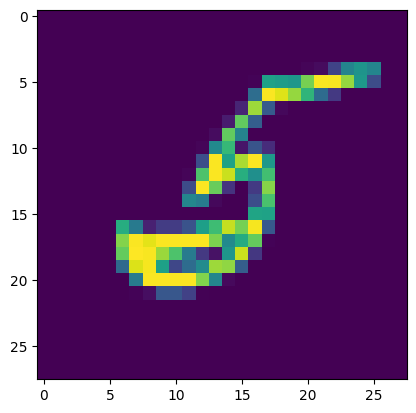

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The predicted digit is 5


In [58]:
index = random.randint(0, len(test_y))
plt.imshow(test_x[index, :])
plt.show()

prediction_y = model.predict(test_x[index, :].reshape(1, 28, 28, 1))
predicted_value = np.argmax(prediction_y)
print("The predicted digit is", predicted_value)